<!-- <h2>1. Get tweets using Twitter Academic API<span class="tocSkip"></span></h2> -->
### 1. Getting tweets using Twitter Academic API

**Search criteria**
*   Keywords: vaccine, vaccination, moderna, pfizer, #antivax, #CashingInOnCovid, #MyBodyMyChoice, #Vax
*   Location: US
*   Retweets: no
*   Timeframe: December 1, 2020 - September 15, 2021
*   Language: English






In [1]:
!twarc2 search  --start-time "2020-12-01" --end-time "2021-09-15" "(vaccine OR vaccination OR moderna OR pfizer OR #antivax OR #CashingInOnCovid OR #MyBodyMyChoice OR #Vax) lang:en place_country:US -is:retweet" --archive tweets_122020_092021_v2.jsonl 

/bin/bash: twarc2: command not found


**Number of tweets**
* December - August: 649,084 
* January - June: 387,000

In [2]:
filt1 =  (tweets["day"]>='2020-12-01') & (tweets["day"]<='2021-08-31')
dec_aug = tweets.loc[filt1]
dec_aug.shape

NameError: name 'tweets' is not defined

In [84]:
filt2 =  (tweets["day"]>='2021-01-01') & (tweets["day"]<='2021-06-30')
jan_jun = tweets.loc[filt2]
jan_jun.shape

(387000, 99)

**Plotting the tweets**

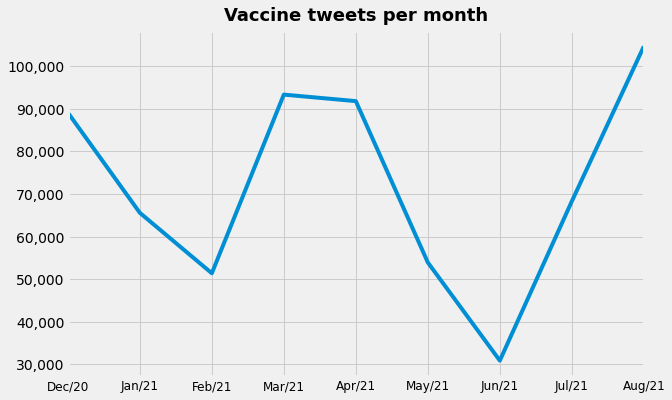

In [16]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt 



plt.style.available
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')


monthly_tweets = tweets_df.groupby('month_year').size()
monthly_tweets
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
p = monthly_tweets.plot(kind='line',  figsize=(10,6),
                            alpha=1, fontsize=14)
ax.set_xticks([611,612, 613,614,615,616,617,618,619])
ax.set_xticklabels(['Dec/20','Jan/21','Feb/21','Mar/21', 'Apr/21', 'May/21', 'Jun/21', 'Jul/21', 'Aug/21'])
# # prettify the graph
p.set_title("Vaccine tweets per month", fontsize=18, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=18, labelpad=10)


p.set_ylabel('', fontsize=14, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks( fontsize=12)


plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


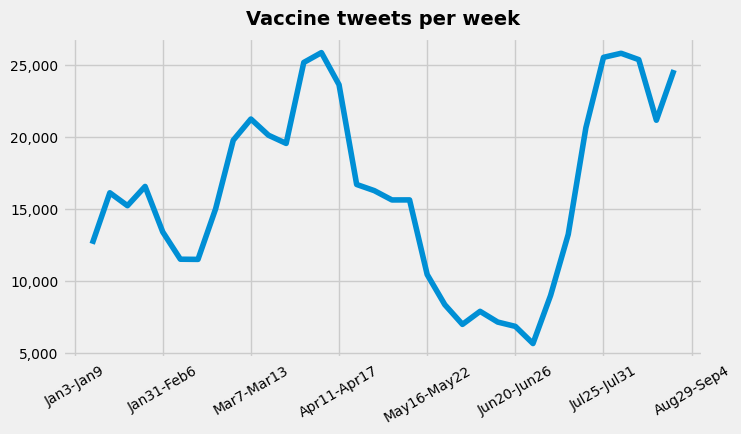

In [32]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt 

tweets_df['week'] = tweets_df['created_at'].dt.week
# tweets_df = tweets_df.reset_index()
filter = (tweets_df['week']<35)
tweets_week = tweets_df.loc[filter]

plt.style.available
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')


week = tweets_week.groupby('week').size()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
p = week.plot(kind='line',  figsize=(8,4),
                            alpha=1, fontsize=14)
ax.set_xticks([0, 5,10, 15,20,25, 30,35])
ax.set_xticklabels(['Jan3-Jan9', 'Jan31-Feb6','Mar7-Mar13','Apr11-Apr17','May16-May22', 'Jun20-Jun26', 'Jul25-Jul31', 'Aug29-Sep4'])
# # prettify the graph
p.set_title("Vaccine tweets per week", fontsize=14, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=10)
plt.yticks( fontsize=10)
p.set_ylabel('', fontsize=11, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks( fontsize=10, rotation=30)


plt.show()



### 2. Getting tweets using Snscrape library

**Search criteria**
*   Keywords: vaccine, vaccination, vaccinate, vaccinated, vax, vaccinating, vaccines
*   Location: US (with coordinates)
*   Retweets: no
*   Timeframe: January 1 - June 30
*   Language: English

**Number of tweets**
January - June: 863,443

In [19]:
# %pwd
tweets_sns.shape

(863443, 24)

**Plotting the tweets**

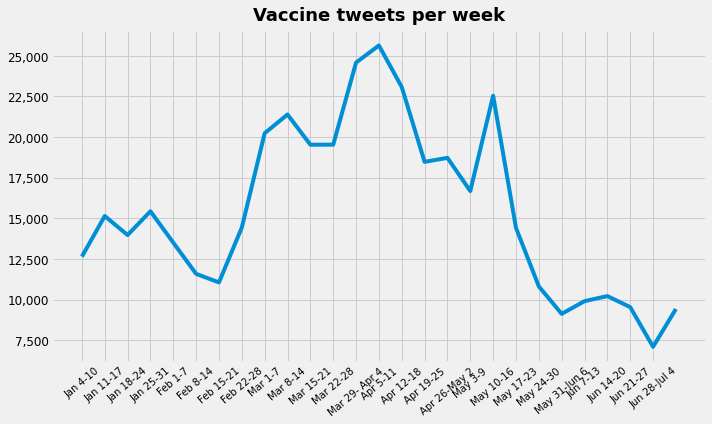

In [26]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 
import matplotlib.ticker as mtick

# prepare data for line bar
month_tweets_sns = df_week_sns.groupby('week_num').size()
month_tweets_sns
# # # plot stacked bar graph
p = month_tweets_sns.plot(kind='line',  figsize=(10,6),
                            alpha=1, fontsize=14)

# # prettify the graph
p.set_title("Vaccine tweets per week", fontsize=18, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=18, labelpad=10)

# p.set_xticklabels(['Jun20', 'Jul20', 'Aug20'], rotation='horizontal', fontsize=18)
p.set_ylabel('', fontsize=14, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.yticks( fontsize=12)

locs, labels=plt.xticks()

positions = ( 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 
             11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
             21, 22, 23, 24, 25, 26)

week =('Jan 4-10', 'Jan 11-17', 'Jan 18-24', 'Jan 25-31', 'Feb 1-7', 
       'Feb 8-14', 'Feb 15-21', 'Feb 22-28', 'Mar 1-7', 'Mar 8-14', 
       'Mar 15-21', 'Mar 22-28', 'Mar 29- Apr 4', 'Apr 5-11', 'Apr 12-18',
      'Apr 19-25', 'Apr 26-May 2', 'May 3-9', 'May 10-16', 'May 17-23', 'May 24-30',
      'May 31-Jun 6', 'Jun 7-13', 'Jun 14-20', 'Jun 21-27', 'Jun 28-Jul 4')

plt.style.use('default')
# plt.xkcd()
# plt.style.use('seaborn-notebook')
# plt.style.use('fivethirtyeight')
plt.xticks(positions, week, rotation=40,  fontsize=10)


# # # prepare to save and display
plt.tight_layout()

# # # # # uncomment to save
# # # plt.savefig('charts/vaccine_tweets_jan21-mar21.png', bbox_inches='tight', transparent=True)
plt.show()

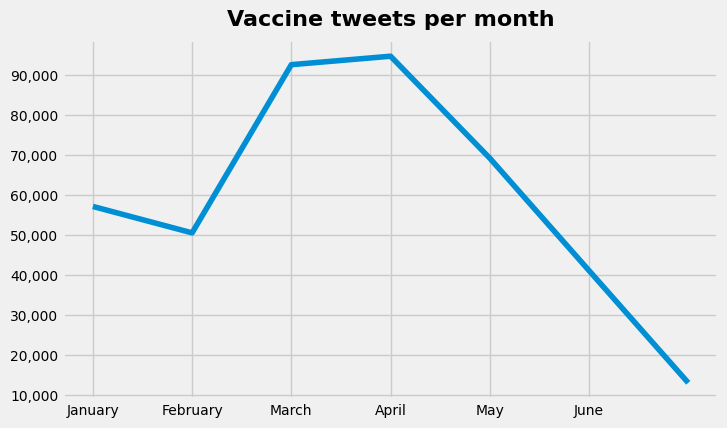

In [82]:

mnth =  (tweets_sns["month"] <= 6) & (tweets_sns["month"] != 7)
df_month_sns = tweets_sns.loc[mnth]

# prepare data for line bar
month_tweets_sns = df_week_sns.groupby('month').size()

# # # plot stacked bar graph
p = month_tweets_sns.plot(kind='line',  figsize=(7.5,4.5),
                            alpha=1, fontsize=14)
# plt.style.use('default')
# plt.xkcd()
# plt.style.use('seaborn-notebook')
plt.style.use('fivethirtyeight')

# # prettify the graph
p.set_title("Vaccine tweets per month", fontsize=16, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=18, labelpad=10)

p.set_ylabel('', fontsize=18, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.yticks( fontsize=18)
# plt.xticks( fontsize=18)

# locs, labels=plt.xticks()


plt.yticks( fontsize=10)
positions = (1, 2, 3, 4, 5, 6 )
labels = ('January', 'February','March', 'April', 'May', 'June')
plt.xticks(positions, labels,   rotation=0, fontsize=10)


# # # prepare to save and display
plt.tight_layout()

# # # # uncomment to save
# # plt.savefig('charts/vaccine_tweets_jan21-mar21.png', bbox_inches='tight', transparent=True)
plt.show()